## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

## Loading Data

In [2]:
data = pd.read_csv('D:/data_for_lr.csv')
data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


## Data Processing

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [4]:
data = data.dropna()
data.isnull().sum()

x    0
y    0
dtype: int64

In [5]:
print('Shape of data: ', data.shape)

Shape of data:  (699, 2)



## Splitting Data

In [6]:
# #Training input and output data
# train_input = np.array(data.x[0:500]).reshape(500,1)
# train_output = np.array(data.y[0:500]).reshape(500,1)

# #Validation of input and ouput data
# test_input = np.array(data.x[500:700]).reshape(200,1)
# test_output = np.array(data.y[500:700]).reshape(200,1)

# training dataset and labels
train_input = np.array(data.x[0:500]).reshape(500,1)
train_output  = np.array(data.y[0:500]).reshape(500,1)

# valid dataset and labels
test_input = np.array(data.x[500:700]).reshape(199,1)
test_output  = np.array(data.y[500:700]).reshape(199,1)

# print the shapes
print("Train Input Shape = {}".format(train_output.shape))
print("Train Output  Shape = {}".format(train_output.shape))
print("Test Input Shape = {}".format(test_input.shape))
print("Test Output  Shape = {}".format(test_output.shape))

Train Input Shape = (500, 1)
Train Output  Shape = (500, 1)
Test Input Shape = (199, 1)
Test Output  Shape = (199, 1)


In [7]:
print(f"Training Input Data Shape: {train_input.shape}")
print(f"Training Output Data Shape: {train_output.shape}")
print(f"Testing Input Data Shape: {test_input.shape}")
print(f"Testing Output Data Shape: {test_output.shape}")

Training Input Data Shape: (500, 1)
Training Output Data Shape: (500, 1)
Testing Input Data Shape: (199, 1)
Testing Output Data Shape: (199, 1)


## <u><font color = 'green'>Linear Regression</font></u>

### Forward Propagation

f(x) = m*x + c

In [8]:
def forward_propagation(train_input, parameters):
    m = parameters['m']
    c = parameters['c']
    predictions = np.multiply(m, train_input) + c
    return predictions

### Cost Function

summation(1/2n*((y-f(x))^2)

In [9]:
def cost_function(predictions, train_output):
    cost = np.mean((train_output - predictions) ** 2) * 0.5
    return cost

### Gradient Descent for BackPropagation

df = summation(f(x)-y)/n

dm = df * x

dc = df * c

In [10]:
def backward_propagation(train_input, train_output, predictions):
    
    derivatives = dict()
    
    df = (train_output - predictions) * -1
    dm = np.mean(np.multiply(train_input, df))
    dc = np.mean(df)
    
    derivatives['dm'] = dm
    derivatives['dc'] = dc
    
    return derivatives

## Updating Parameters

m` = m - (learning_rate * dm)
c` = c - (learning_rate * dc)

In [11]:
def update_parameters(parameters, derivatives, learning_rate):
    parameters['m'] = parameters['m'] - learning_rate * derivatives['dm']
    parameters['c'] = parameters['c'] - learning_rate * derivatives['dc']
    return parameters

## Model Training

In [12]:
def train(train_input, train_output, learning_rate, iters):
    
    #random parameters
    parameters = dict()
    parameters["m"] = np.random.uniform(0,1) * -1
    parameters["c"] = np.random.uniform(0,1) * -1
    
    plt.figure()
    
    #loss
    loss = list()
    
    #iterate
    for i in range(iters):
        
        #forward propagation
        predictions = forward_propagation(train_input, parameters)
        
        #cost function
        cost = cost_function(predictions, train_output)
        
        #append loss and print
        loss.append(cost)
        print("Iteration = {}, Loss = {}".format(i+1, cost))
        
        #plot function
        fig, ax = plt.subplots()
        
        ax.plot(train_input, train_output, '+', label='Original')
        ax.plot(train_input, predictions, '*', label='Training')

        legend = ax.legend()
        
        plt.plot(train_input, train_output, '+')
        plt.plot(train_input, predictions, '*')        
        
        plt.show()
        
        #back propagation
        derivatives = backward_propagation(train_input, train_output, predictions)
        
        #update parameters
        parameters = update_parameters(parameters, derivatives, learning_rate)
        
    return parameters, loss

Iteration = 1, Loss = 2779.091838046115


<Figure size 432x288 with 0 Axes>

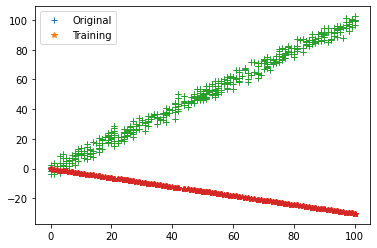

Iteration = 2, Loss = 1263.01464157393


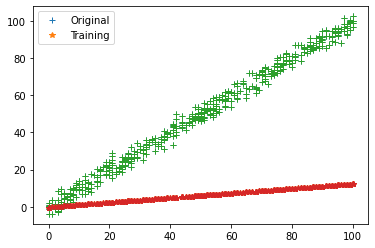

Iteration = 3, Loss = 575.1687381958556


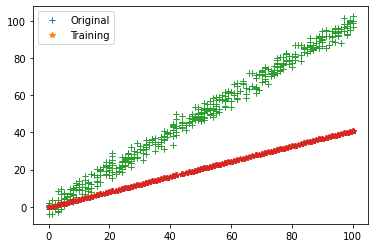

Iteration = 4, Loss = 263.09228987769757


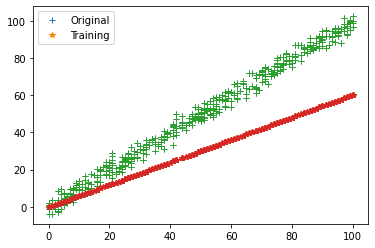

Iteration = 5, Loss = 121.50285953796276


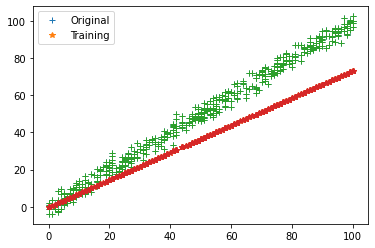

Iteration = 6, Loss = 57.26357809348966


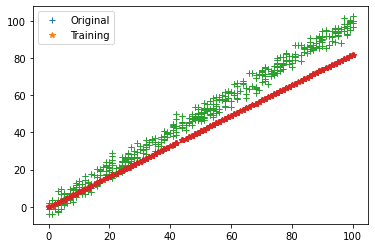

Iteration = 7, Loss = 28.11814487901307


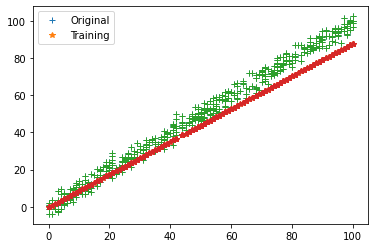

Iteration = 8, Loss = 14.89482947788203


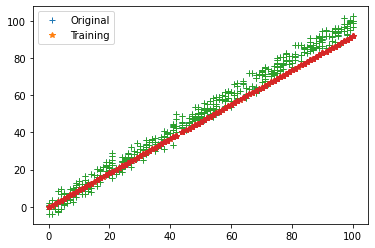

Iteration = 9, Loss = 8.895396564663239


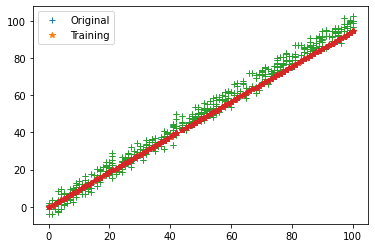

Iteration = 10, Loss = 6.173447137683679


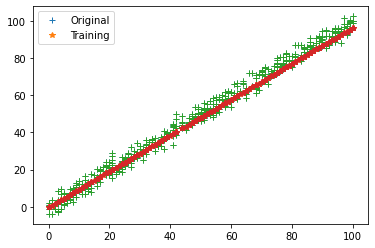

Iteration = 11, Loss = 4.938495598690139


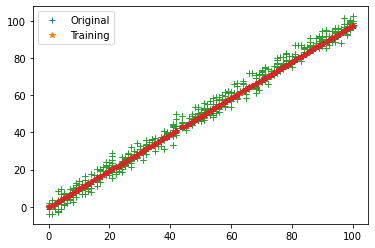

Iteration = 12, Loss = 4.378196648539479


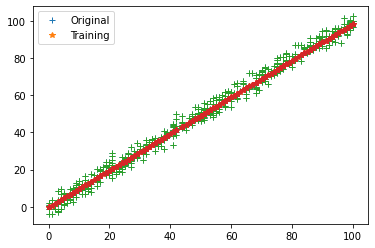

Iteration = 13, Loss = 4.12398832522331


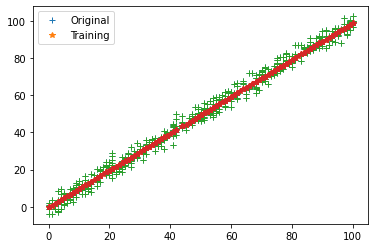

Iteration = 14, Loss = 4.008653658344025


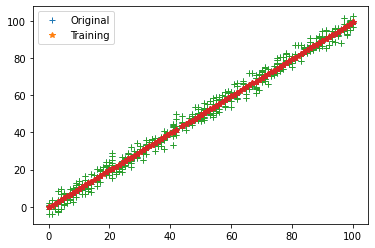

Iteration = 15, Loss = 3.956326123215819


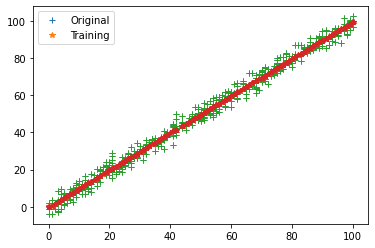

Iteration = 16, Loss = 3.932584993555848


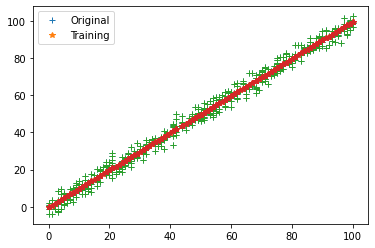

Iteration = 17, Loss = 3.921813547723773


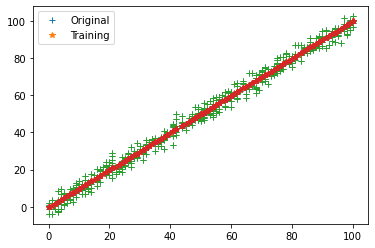

Iteration = 18, Loss = 3.9169264618136475


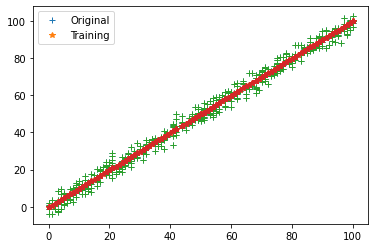

Iteration = 19, Loss = 3.9147091165213452


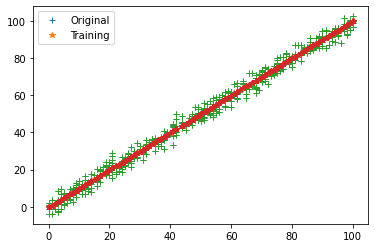

Iteration = 20, Loss = 3.9137030355079405


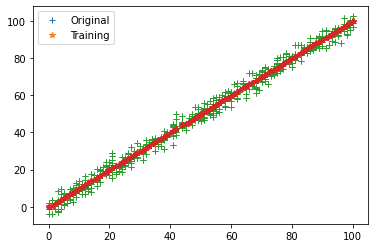

In [13]:
parameters, loss = train(train_input, train_output, 0.0001, 20)

In [14]:
parameters.items()

dict_items([('m', 1.002653585836524), ('c', -0.37712276298047653)])

In [15]:
loss

[2779.091838046115,
 1263.01464157393,
 575.1687381958556,
 263.09228987769757,
 121.50285953796276,
 57.26357809348966,
 28.11814487901307,
 14.89482947788203,
 8.895396564663239,
 6.173447137683679,
 4.938495598690139,
 4.378196648539479,
 4.12398832522331,
 4.008653658344025,
 3.956326123215819,
 3.932584993555848,
 3.921813547723773,
 3.9169264618136475,
 3.9147091165213452,
 3.9137030355079405]

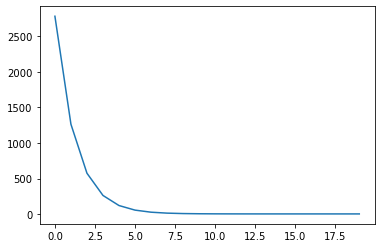

In [16]:
plt.plot(loss)

## Let's Predict

In [17]:
test_predictions = test_input * parameters['m'] + parameters['c']

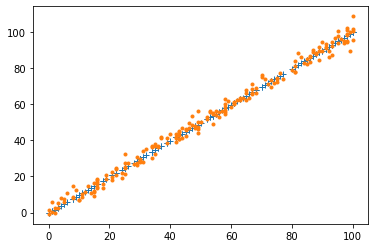

In [18]:
plt.plot(test_input, test_predictions, '+')
plt.plot(test_input, test_output, '.')
plt.show()

## Cost of Predictions

In [19]:
cost_function(test_output, test_predictions)

4.042312699687616